In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
from constants import *

In [2]:
date_column = 'Date'

###  System Price of electricity, pence per kilowatt-hour
Source: ONS calculations from BMRS data © Elexon Limited copyright and database right 2024

The System Price is used to **settle the difference between contracted generation or consumption of electricity and actual generation or consumption**. This is calculated for each half hour trading period in the Balancing Market, which is the mechanism used to balance supply and demand on Great Britain’s electricity market.

Companies are contracted **to generate or consume**a certain amount of electricity within each half-hour (known as the Settlement Period), however this may differ from the actual amount generated or consumed. Where companies have generated more or less than the amount of energy their customers consume, this difference is balanced by the UK’s National Grid Transmission System, which buys or sells enough electricity to reconcile the difference. The System Price is designed to reflect the cost incurred by National Grid in doing this.

In [3]:
system_prices = pd.read_excel("data/electricitypricesdataset270624.xlsx", sheet_name="Data")
system_prices[date_column] = pd.to_datetime(system_prices[date_column])
system_prices.set_index(date_column)
system_prices.head()

,Date,Daily average,7-day average
0,2020-01-01,3.951,3.721
1,2020-01-02,1.771,3.486
2,2020-01-03,2.135,3.113
3,2020-01-04,2.700,2.989
4,2020-01-05,2.758,2.853


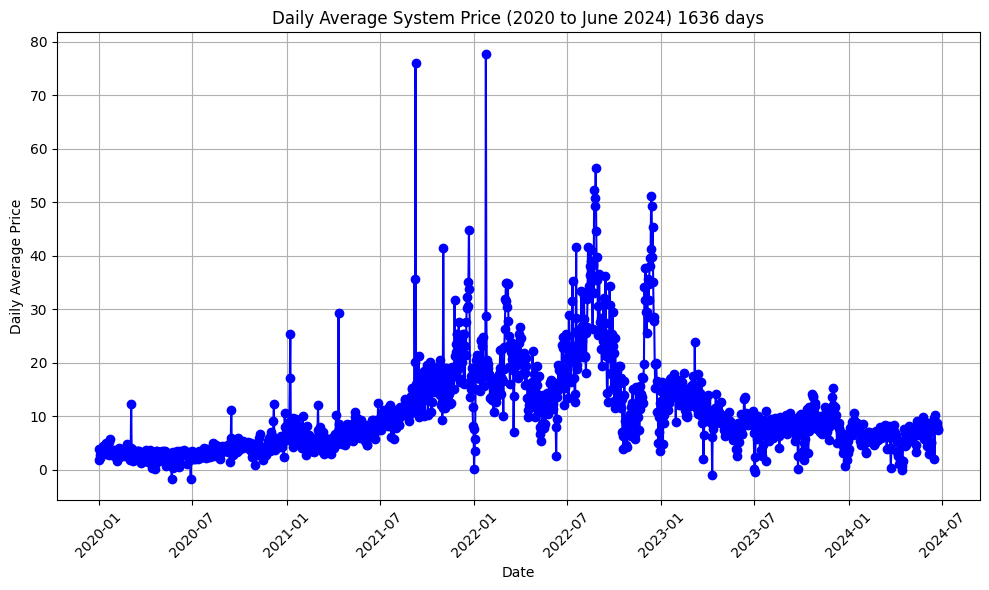

In [4]:
# Graph the daily average system price from 2020 to June 2024

# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(system_prices[date_column], system_prices['Daily average'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title(f'Daily Average System Price (2020 to June 2024) {len(system_prices)} days')
plt.xlabel(date_column)
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## 15 - Day Prediction

In [5]:
start = '2023-02-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


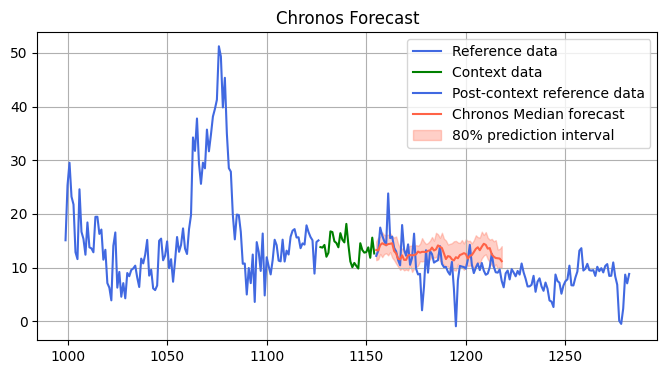

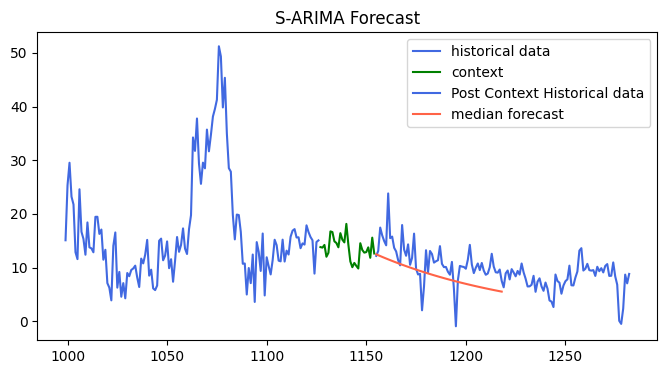

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


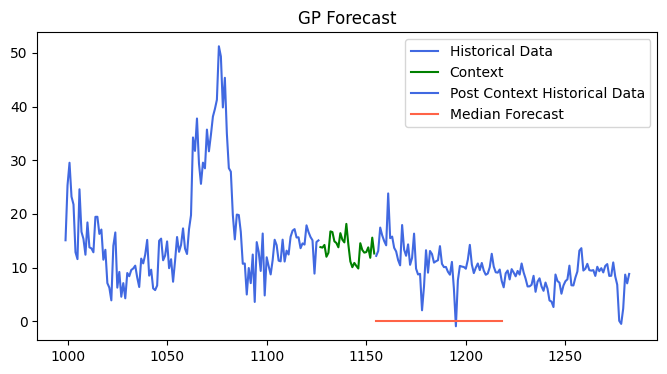

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


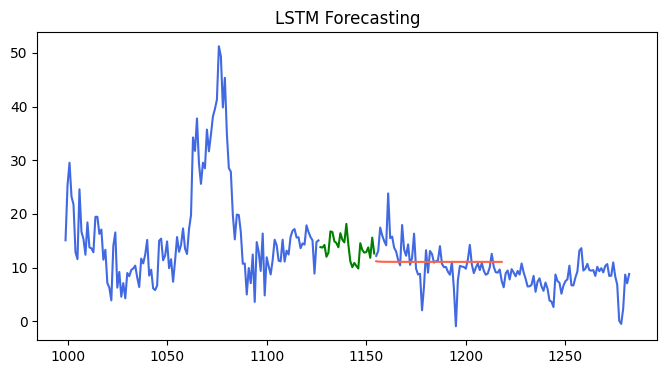


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.2118451957598899
- sarima MSE: 0.24492525727395698
- gp MSE: 2.1378503247070313
- lstm MSE: 0.19369027085054502
NMSE
- chronos_mini NMSE: 1.0921447240305528
- sarima NMSE: 1.262685361138713
- gp NMSE: 11.021453399123343
- lstm NMSE: 0.9985489953958325



In [6]:
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

In [7]:
context_window_length = utils.find_first_occurrence_index(system_prices,end,"Date") - utils.find_first_occurrence_index(system_prices,start,"Date")
print(f"context_window_length: {context_window_length}")
#utils.whole_window_comparison_of_data(system_prices,column,context_window_length,prediction_length)

context_window_length: 28


## One Month Prediction

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


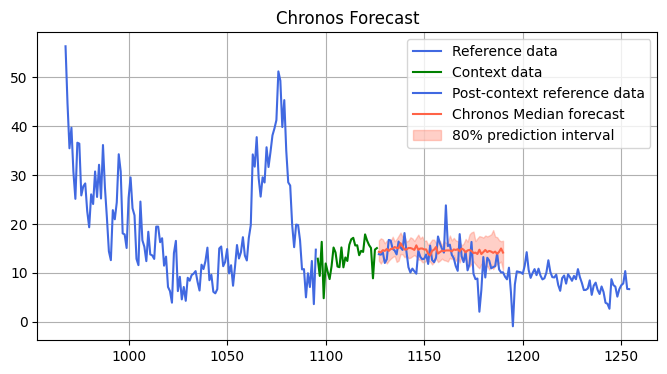

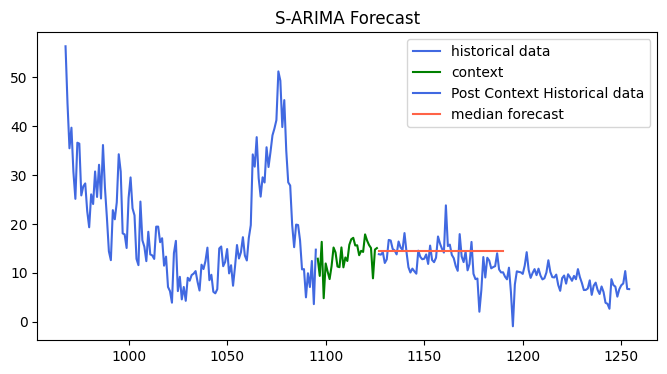

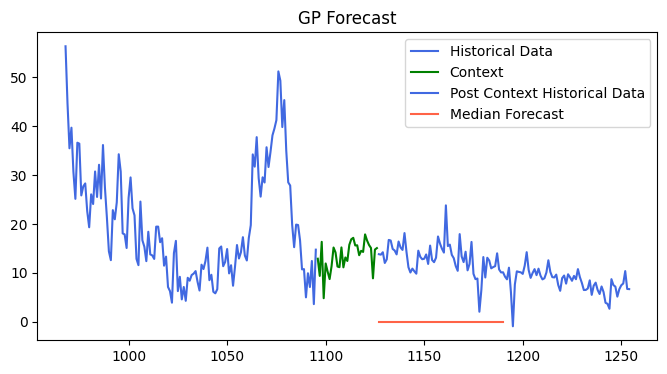

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


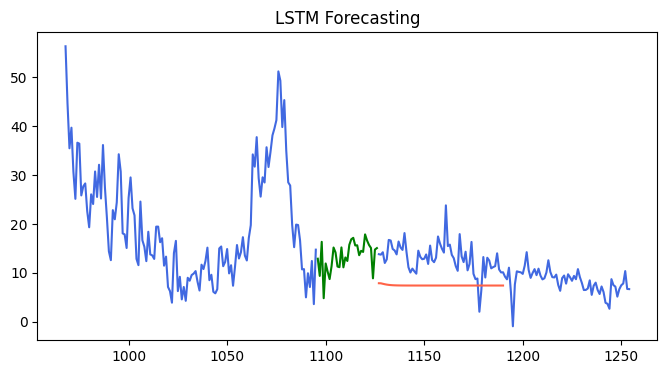


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.18960180716218353
- sarima MSE: 0.17897524818123925
- gp MSE: 2.7866350781249998
- lstm MSE: 0.62962672510054
NMSE
- chronos_mini NMSE: 1.2772355602024823
- sarima NMSE: 1.2056506991919478
- gp NMSE: 18.77191714762706
- lstm NMSE: 4.241423934658774



In [8]:
start = '2023-01-01'
end = '2023-02-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Two Month Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


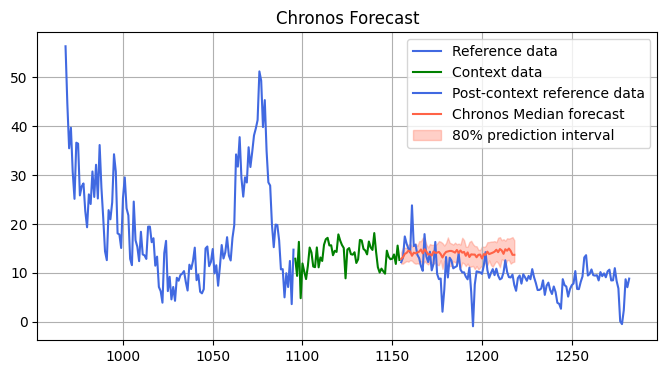

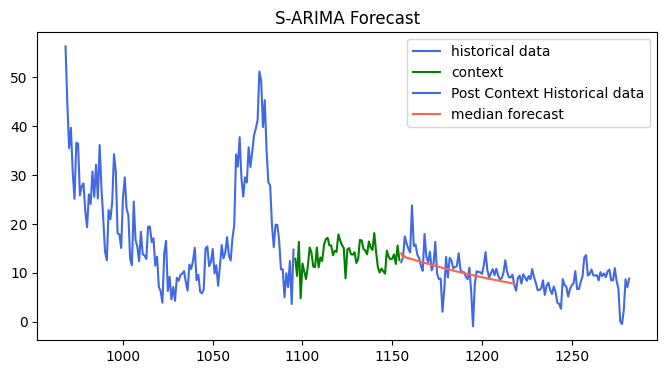

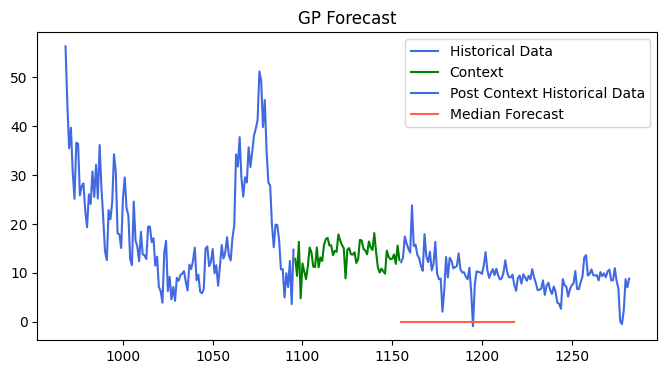

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


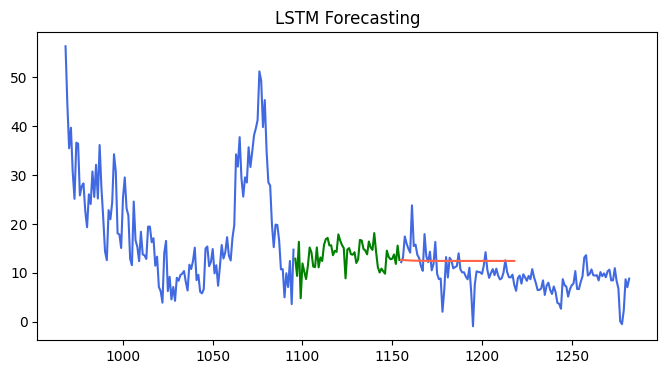


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.3235625748705484
- sarima MSE: 0.14960886469808093
- gp MSE: 2.1378503247070313
- lstm MSE: 0.2184943150569202
NMSE
- chronos_mini NMSE: 1.6680914465444654
- sarima NMSE: 0.7712921299069957
- gp NMSE: 11.021453399123343
- lstm NMSE: 1.1264235309378952



In [9]:
start = '2023-01-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Three Months Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


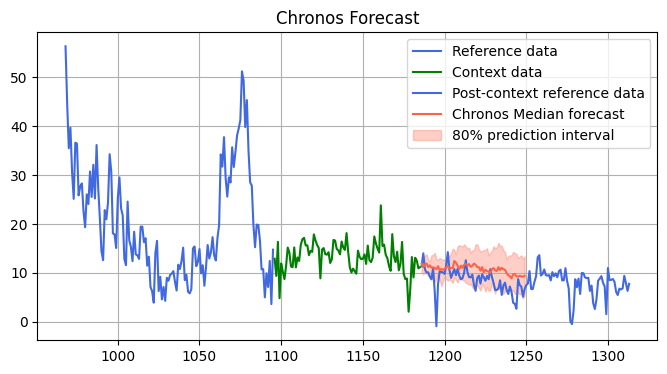

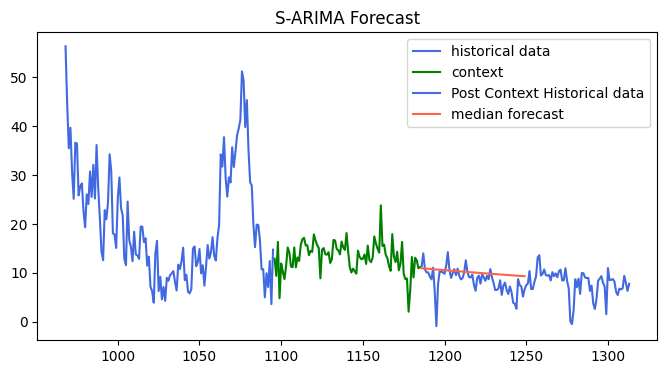

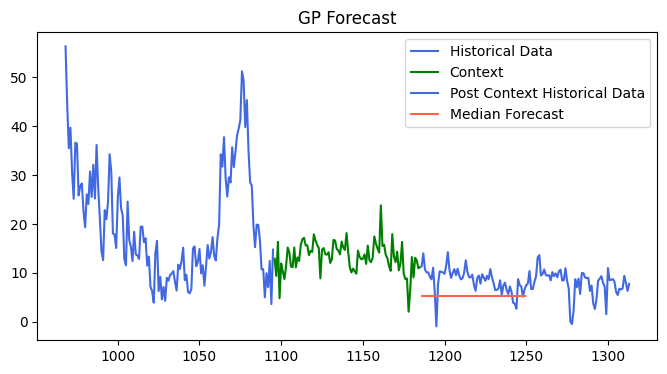

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


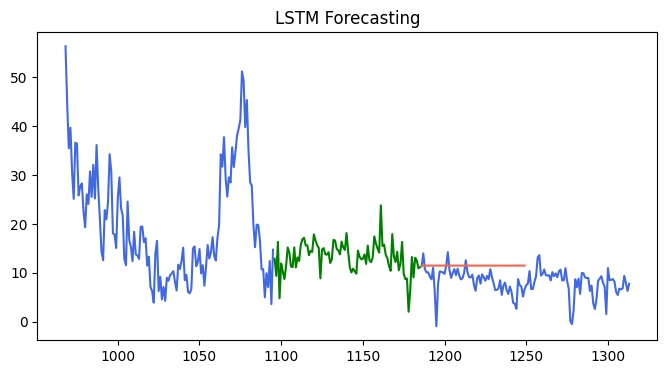


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.15474166360811328
- sarima MSE: 0.12055435634730258
- gp MSE: 0.26137200709560854
- lstm MSE: 0.2345315232627013
NMSE
- chronos_mini NMSE: 1.5844327425224138
- sarima NMSE: 1.2343816461358381
- gp NMSE: 2.6762434651721665
- lstm NMSE: 2.4014180534607985



In [10]:
start = '2023-01-01'
end = '2023-04-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Six Months Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


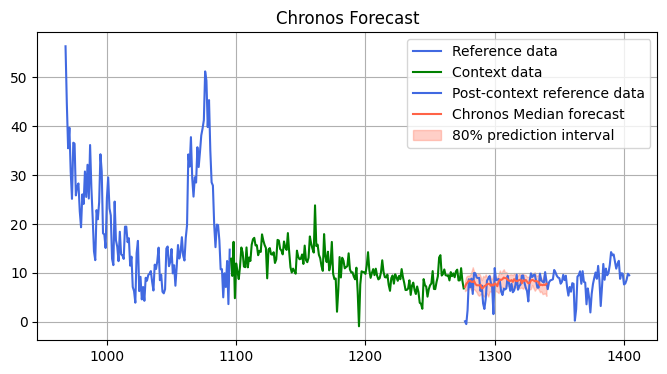

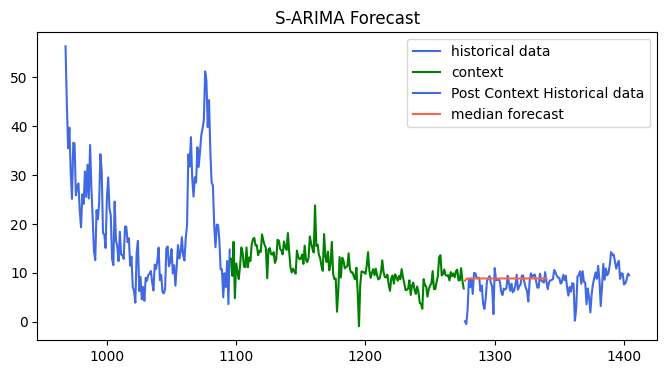

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


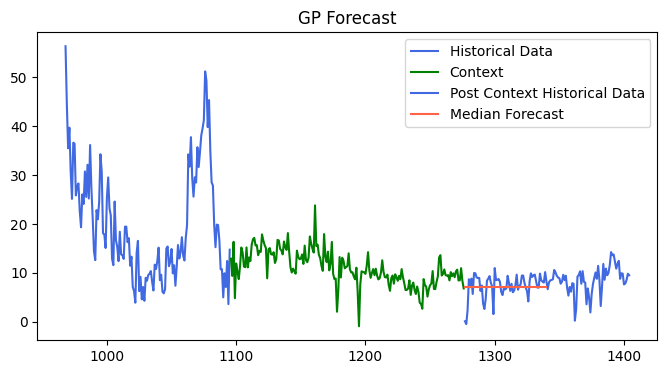

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


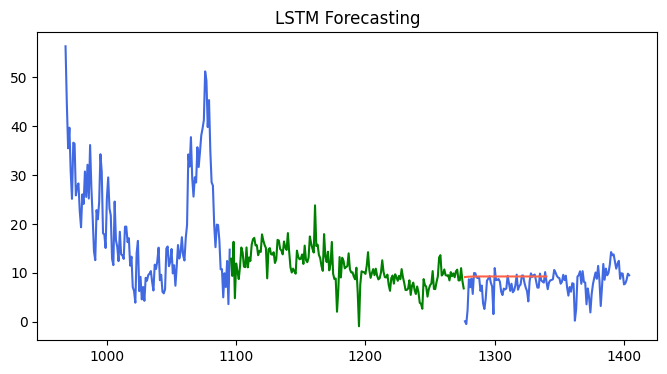


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.08982407842133762
- sarima MSE: 0.11722729251889463
- gp MSE: 0.08657670052159275
- lstm MSE: 0.14016522448613644
NMSE
- chronos_mini NMSE: 1.0454833130226218
- sarima NMSE: 1.3644356871042738
- gp NMSE: 1.0076863273487313
- lstm NMSE: 1.6314156052784496



In [11]:
start = '2023-01-01'
end = '2023-07-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Having seen one anomaly, can you predict next?

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


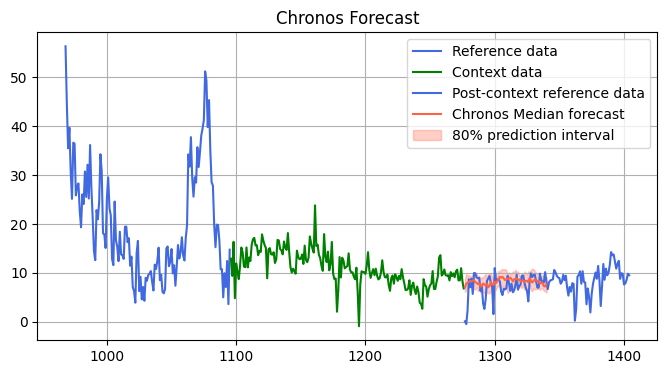

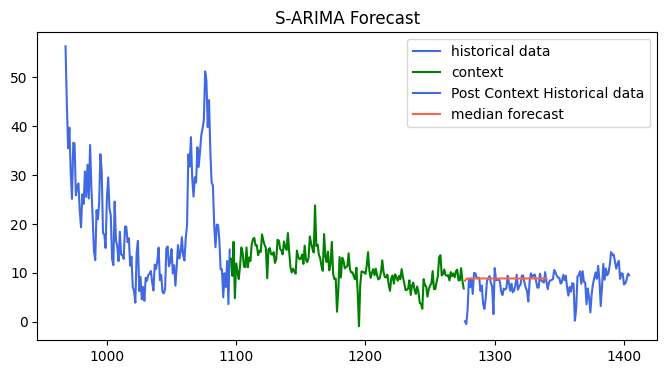

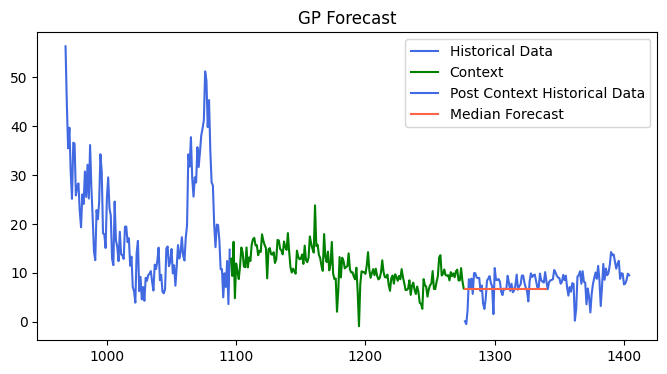

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


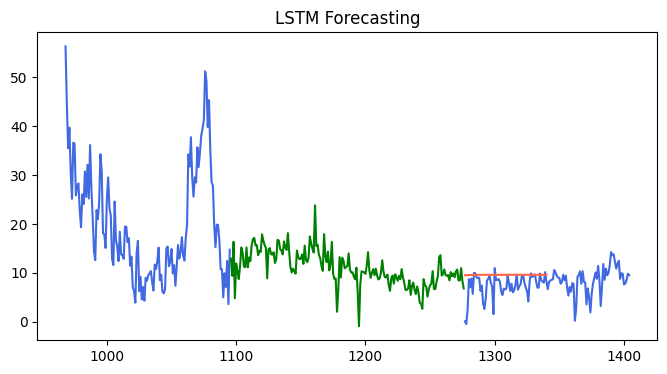


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.09322868026497344
- sarima MSE: 0.11722729251889463
- gp MSE: 0.09536026795114923
- lstm MSE: 0.16214767741060057
NMSE
- chronos_mini NMSE: 1.0851102646993311
- sarima NMSE: 1.3644356871042738
- gp NMSE: 1.109920308902489
- lstm NMSE: 1.8872744809357052



In [12]:
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## One Year Context Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


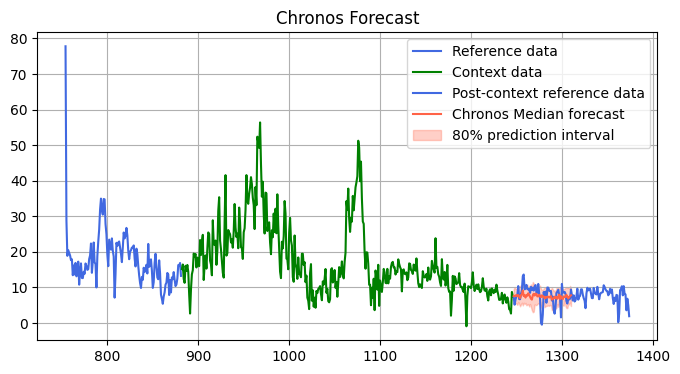

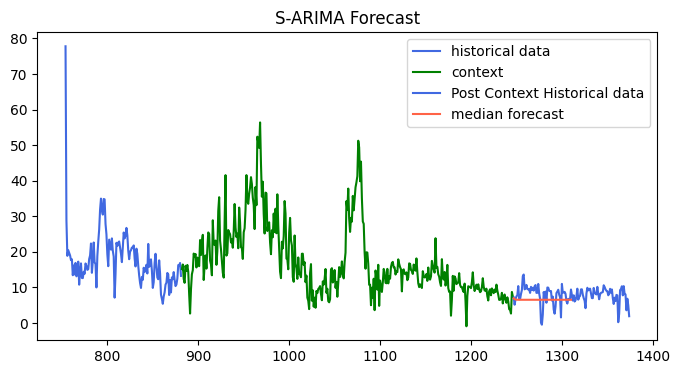

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


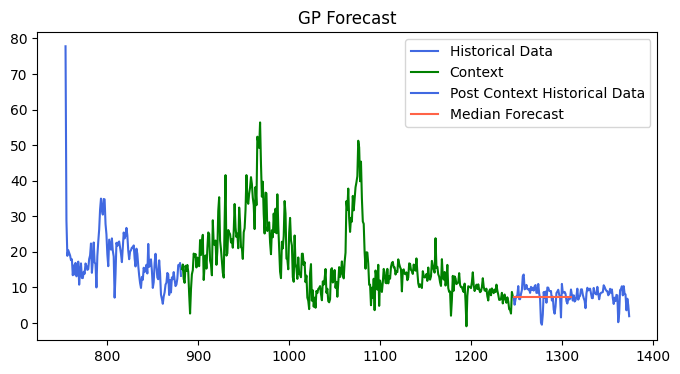

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


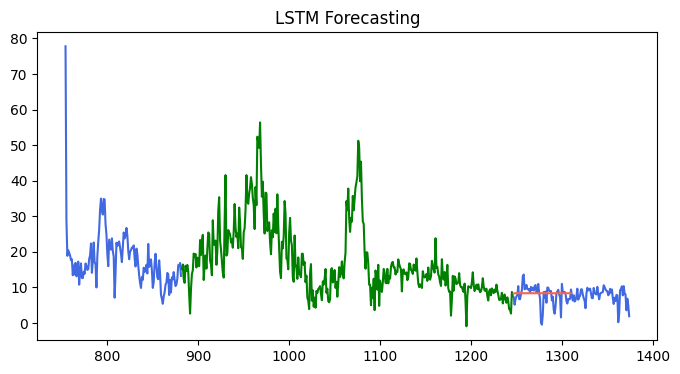


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.10611996772641684
- sarima MSE: 0.13940358212739123
- gp MSE: 0.114441787366007
- lstm MSE: 0.11343829840852047
NMSE
- chronos_mini NMSE: 0.96425932022861
- sarima NMSE: 1.2666909557128476
- gp NMSE: 1.0398755526932075
- lstm NMSE: 1.0307573480731544



In [13]:
start = '2022-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Two Year Context Comparison

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


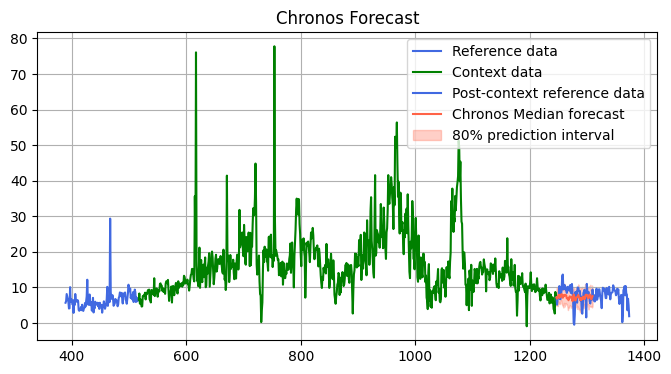

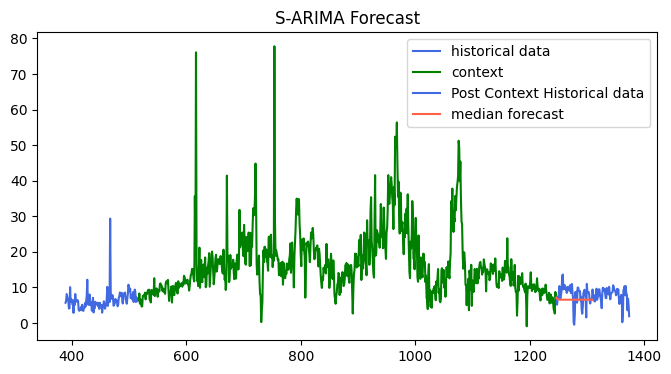

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


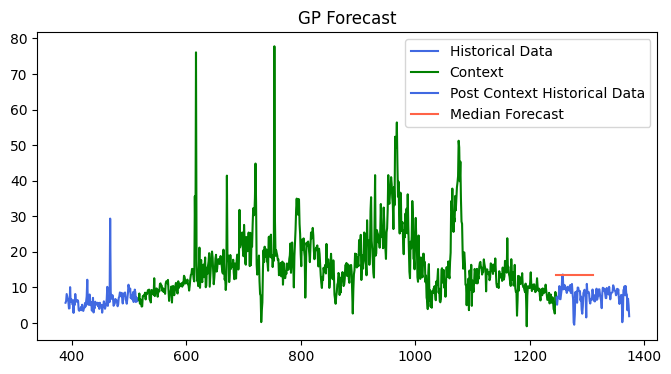

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


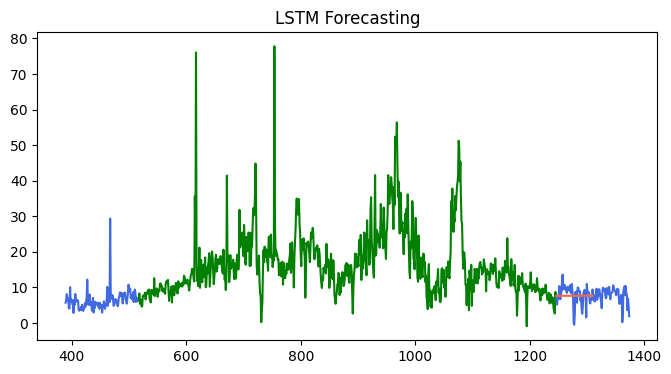


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.11712720197748433
- sarima MSE: 0.13858820467852861
- gp MSE: 0.6171326507422774
- lstm MSE: 0.11108033988839822
NMSE
- chronos_mini NMSE: 1.0642765784687789
- sarima NMSE: 1.2592820267297842
- gp NMSE: 5.60757718876967
- lstm NMSE: 1.0093317527921417



In [14]:
start = '2021-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Three Year Context

In [15]:
start = '2020-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

# utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

In [16]:
len(values)

NameError: name 'values' is not defined

## Next steps 

- Fine tune
- Move context window around and get histogram of error 
- See how to extract attention weights
